In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
db_filename = "/Users/akhilmittal/Documents/Spring 2021/CSE 578 DV/Assignments/ass2/dinofunworld-1.db"
conn=sqlite3.connect(db_filename)
c=conn.cursor()

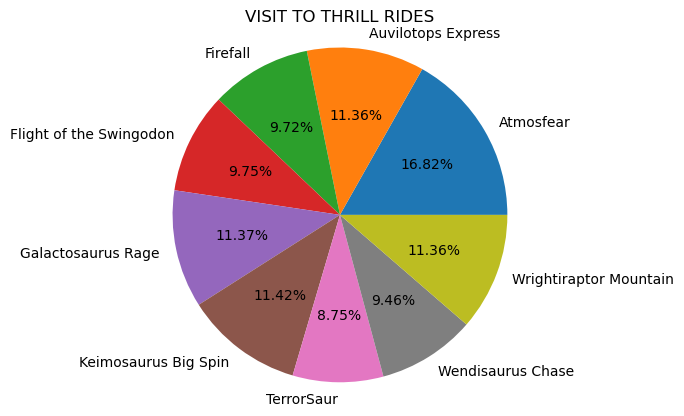

,thrill Ride Name,No of visits
0,Atmosfear,27665
1,Auvilotops Express,18684
2,Firefall,15989
3,Flight of the Swingodon,16033
4,Galactosaurus Rage,18708
5,Keimosaurus Big Spin,18778
6,TerrorSaur,14388
7,Wendisaurus Chase,15552
8,Wrightiraptor Mountain,18687


In [5]:
c.execute("SELECT a.Name, COUNT(*) FROM attraction a, checkin c WHERE a.AttractionID = c.attraction AND a.Category LIKE '%Thrill Rides%' AND ( c.duration  NOT LIKE '%@%' ) AND c.duration IS  NOT NULL GROUP BY a.Name;")
thrill_count=c.fetchall()
thrill_ride_count=pd.DataFrame.from_records(thrill_count,columns=['thrill Ride Name','No of visits'] )
plt.style.use('default')
plt.pie(thrill_ride_count['No of visits'],labels=thrill_ride_count['thrill Ride Name'],autopct='%.2f%%')
plt.title('VISIT TO THRILL RIDES')
plt.axis('equal')
plt.show()
thrill_ride_count

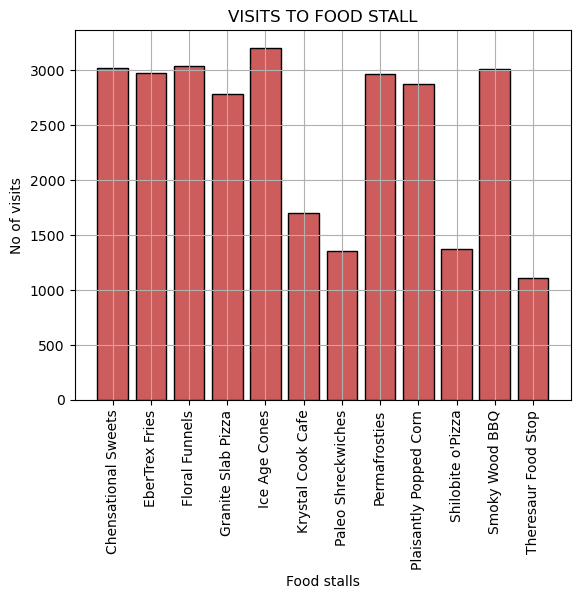

,food stall Name,No of visits
0,Chensational Sweets,3023
1,EberTrex Fries,2978
2,Floral Funnels,3041
3,Granite Slab Pizza,2789
4,Ice Age Cones,3205
5,Krystal Cook Cafe,1698
6,Paleo Shreckwiches,1353
7,Permafrosties,2971
8,Plaisantly Popped Corn,2879
9,Shilobite o'Pizza,1378


In [6]:
c.execute("SELECT a.Name, COUNT(*) FROM attraction a, checkin c WHERE a.AttractionID = c.attraction AND a.Category LIKE '%Food%' AND ( c.duration  NOT LIKE '%@%' ) AND c.duration IS  NOT NULL GROUP BY a.Name;")
food_stall=c.fetchall()
food_stall_count=pd.DataFrame.from_records(food_stall,columns=['food stall Name','No of visits'])




##############TO GET X TICKS#####################################

ypos=[]
for item in range(len(food_stall_count['food stall Name'])):
    ypos.append(item)
    
plt.bar(ypos,food_stall_count['No of visits'],color='indianred',edgecolor='black')
plt.xticks(ypos,food_stall_count['food stall Name'],rotation='vertical')

#################^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^##################

plt.grid(True)
plt.title('VISITS TO FOOD STALL')
plt.ylabel('No of visits')
plt.xlabel('Food stalls')
plt.show()
food_stall_count
# ypos

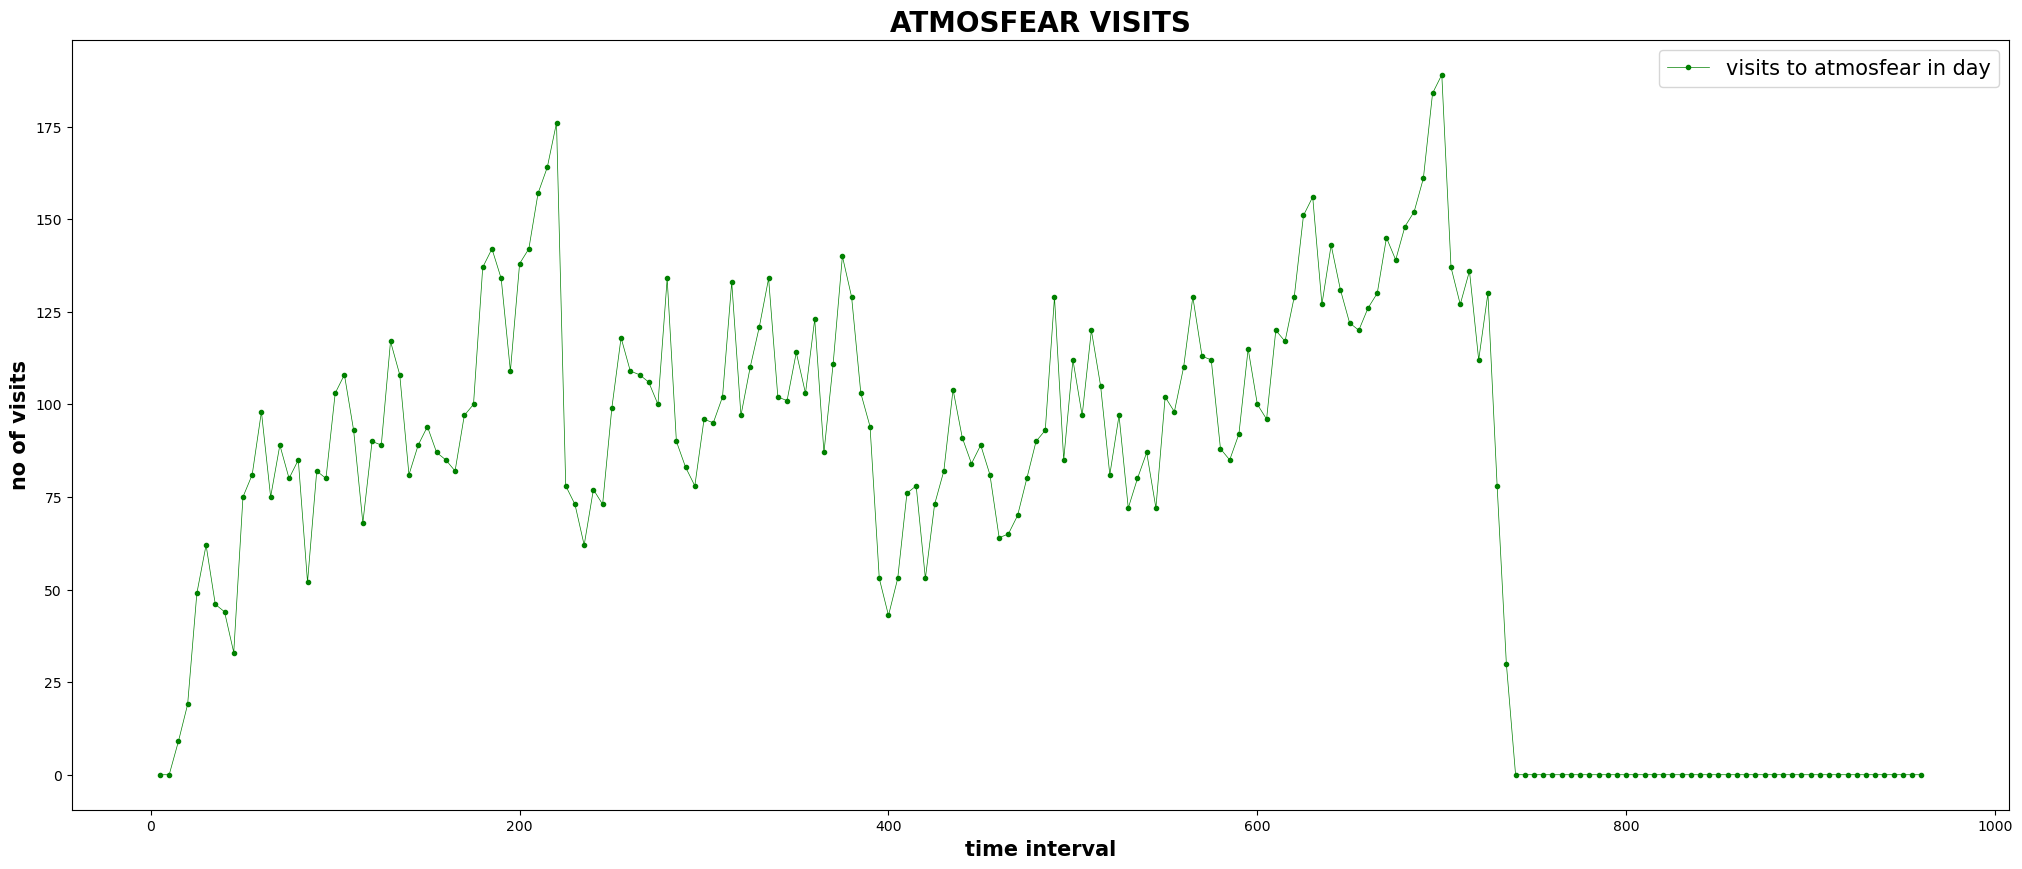

In [51]:
c.execute("SELECT sequence FROM sequences")
sequences=c.fetchall()

##########################################################################################################################################
###############################################               METHOD 1.    #####################################################################################
atmosfear=[0]*192

for row in sequences:
    sequence=[int(i) for i in row[0].split('-')[0:192]]
    count=0
    for visit in sequence:
        if(visit==8):
            atmosfear[count]+=1
        count+=1

time_interval=[]
for i in range(1,193):
    time_interval.append(5*i)
    

plt.figure(figsize=(25,10))
plt.plot(time_interval,atmosfear,'g.-',label='visits to atmosfear in day',linewidth=0.5)
plt.title('ATMOSFEAR VISITS',fontweight='bold',fontsize=20)
plt.xlabel('time interval',fontweight='bold',fontsize=15)
plt.ylabel('no of visits',fontweight='bold',fontsize=15)
plt.legend(fontsize=15)

#plt.save.fig()
#plt.xticks()
#plt.yticks()
#Plt.grid(True)
plt.show()
#change query to count @ terms and NULL too

##########################################################################################################################################
###################################################################METHOD 2.   ##################################################################
atmosfear={i:0 for i in range(192)}
atomosfear = [for j in [for int(i) in i.split("-")[:192]] for i in sequences]

for row in sequences:
    sequence=[int(i) for i in row[0].split('-')[0:192]]
    for visit in sequence:
        if(visit==8)


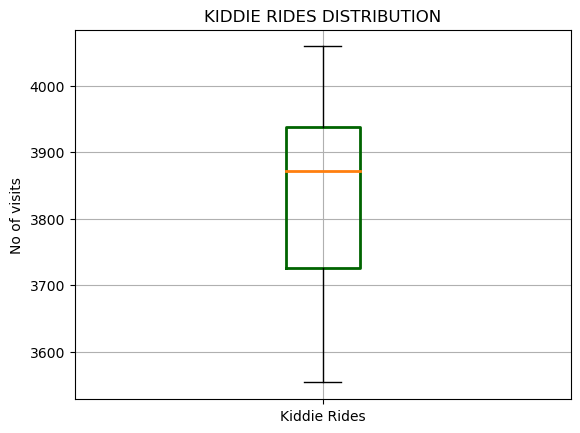

,kidde ride Name,No of visits
0,Beelzebufo,3951
1,Blue Iguanodon,3922
2,Cyndisaurus Asteroid,3747
3,Enchanted Toadstools,3704
4,Flying TyrAndrienkos,3640
5,Jeredactyl Jump,3753
6,North Line,3554
7,Sauroma Bumpers,4059
8,Stegocycles,3925
9,Stone Cups,3872


In [8]:
c.execute("SELECT a.Name, COUNT(*) FROM attraction a, checkin c WHERE a.AttractionID = c.attraction AND a.Category LIKE '%Kiddie Rides%' AND ( c.duration  NOT LIKE '%@%' ) AND c.duration IS  NOT NULL GROUP BY a.Name;")
kiddie=c.fetchall()
kiddie_count=pd.DataFrame.from_records(kiddie,columns=['kidde ride Name','No of visits'])
boxes=plt.boxplot(kiddie_count['No of visits'],labels=['Kiddie Rides'], patch_artist=False,medianprops={'linewidth':2})
for box in boxes['boxes']:
    box.set(color='darkgreen',linewidth=2)
plt.ylabel('No of visits')
plt.title('KIDDIE RIDES DISTRIBUTION')
plt.grid(True)
plt.show()
kiddie_count